In [1]:
#Importing Packages into python environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2
import xgboost as xgb
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Price paid dataset into dataframe using pandas
priceData = pd.read_csv('pp-complete.csv')
priceData.head()

,{D5592EC2-8127-4D0B-81FA-BD6306BF6AB5},48000,1995-03-31 00:00,B97 6NJ,S,N,F,112,Unnamed: 8,FOXLYDIATE CRESCENT,REDDITCH,REDDITCH.1,REDDITCH.2,WORCESTERSHIRE,A,A.1
0,{DA9E3729-A1C3-4EF5-9DD2-BD632381A89F},23000,1995-10-20 00:00,LE10 2SE,F,N,L,30,NaN,TILTON ROAD,BURBAGE,HINCKLEY,HINCKLEY AND BOSWORTH,LEICESTERSHIRE,A,A
1,{C8F270A4-B071-4CEB-BE3E-C0EAC816BF34},39500,1995-05-31 00:00,SS13 1NG,T,N,F,68,NaN,PLUMLEYS,PITSEA,BASILDON,BASILDON,ESSEX,A,A
2,{9894201D-BAE7-4432-B8EB-C0EACD1C8C64},335000,1995-08-24 00:00,HA6 2TP,D,N,F,19,NaN,COPSE WOOD WAY,NORTHWOOD,NORTHWOOD,HILLINGDON,GREATER LONDON,A,A
3,{AECD3A3E-3ADE-4B3F-90DD-B9E11C04769A},60000,1995-10-09 00:00,DL7 0SU,D,N,F,KEEPERS COTTAGE,NaN,NaN,KIRKBY FLEETHAM,NORTHALLERTON,HAMBLETON,NORTH YORKSHIRE,A,A
4,{9FE17499-3C2D-463F-9EAA-B9E12004C702},48000,1995-09-29 00:00,SS3 9YF,S,N,L,2,NaN,CHAFFINCH CLOSE,SHOEBURYNESS,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,A,A


In [3]:
# Adding column names to our dataframe
data_columns = ['Transaction_unique_numner','Price','Data_of_transfer','Postcode','Property_type','Old_new',
          'Duration','PAON','SAON','Street','Locality','Town','District','County','PPD_category_type',
           'Record_status_monthly_file']
priceData.columns = data_columns
priceData.head()

,Transaction_unique_numner,Price,Data_of_transfer,Postcode,Property_type,Old_new,Duration,PAON,SAON,Street,Locality,Town,District,County,PPD_category_type,Record_status_monthly_file
0,{DA9E3729-A1C3-4EF5-9DD2-BD632381A89F},23000,1995-10-20 00:00,LE10 2SE,F,N,L,30,NaN,TILTON ROAD,BURBAGE,HINCKLEY,HINCKLEY AND BOSWORTH,LEICESTERSHIRE,A,A
1,{C8F270A4-B071-4CEB-BE3E-C0EAC816BF34},39500,1995-05-31 00:00,SS13 1NG,T,N,F,68,NaN,PLUMLEYS,PITSEA,BASILDON,BASILDON,ESSEX,A,A
2,{9894201D-BAE7-4432-B8EB-C0EACD1C8C64},335000,1995-08-24 00:00,HA6 2TP,D,N,F,19,NaN,COPSE WOOD WAY,NORTHWOOD,NORTHWOOD,HILLINGDON,GREATER LONDON,A,A
3,{AECD3A3E-3ADE-4B3F-90DD-B9E11C04769A},60000,1995-10-09 00:00,DL7 0SU,D,N,F,KEEPERS COTTAGE,NaN,NaN,KIRKBY FLEETHAM,NORTHALLERTON,HAMBLETON,NORTH YORKSHIRE,A,A
4,{9FE17499-3C2D-463F-9EAA-B9E12004C702},48000,1995-09-29 00:00,SS3 9YF,S,N,L,2,NaN,CHAFFINCH CLOSE,SHOEBURYNESS,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,A,A


In [4]:
# Datatypes of each columns
priceData.dtypes

Transaction_unique_numner     object
Price                          int64
Data_of_transfer              object
Postcode                      object
Property_type                 object
Old_new                       object
Duration                      object
PAON                          object
SAON                          object
Street                        object
Locality                      object
Town                          object
District                      object
County                        object
PPD_category_type             object
Record_status_monthly_file    object
dtype: object

In [5]:
# Overview of our dataset
priceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26388375 entries, 0 to 26388374
Data columns (total 16 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   Transaction_unique_numner   object
 1   Price                       int64 
 2   Data_of_transfer            object
 3   Postcode                    object
 4   Property_type               object
 5   Old_new                     object
 6   Duration                    object
 7   PAON                        object
 8   SAON                        object
 9   Street                      object
 10  Locality                    object
 11  Town                        object
 12  District                    object
 13  County                      object
 14  PPD_category_type           object
 15  Record_status_monthly_file  object
dtypes: int64(1), object(15)
memory usage: 3.1+ GB


In [6]:
# Count all NaN values for each column
for col in priceData:
    count = priceData[col].isna().sum()
    print(col,' = ',count)

# Get shape of our dataframe
priceData.shape

Transaction_unique_numner  =  0
Price  =  0
Data_of_transfer  =  0
Postcode  =  42218
Property_type  =  0
Old_new  =  0
Duration  =  0
PAON  =  4196
SAON  =  23311404
Street  =  413200
Locality  =  8909698
Town  =  0
District  =  0
County  =  0
PPD_category_type  =  0
Record_status_monthly_file  =  0


(26388375, 16)

In [7]:
# Dropping columns which has high number of NaN values
dropCols = ['SAON','Locality']
priceData = priceData.drop(columns=dropCols)
priceData.shape

(26388375, 14)

In [8]:
# Cleaning our dataframes by dropping rows which has null values
priceData = priceData.dropna()
priceData.shape

(25936260, 14)

In [9]:
# Dropping duplicate records from our dataframe
priceData = priceData.drop_duplicates()
priceData.shape

(25936260, 14)

In [10]:
# Checking all columns of dataframe after cleaning process.
print(priceData.isnull().sum())

Transaction_unique_numner     0
Price                         0
Data_of_transfer              0
Postcode                      0
Property_type                 0
Old_new                       0
Duration                      0
PAON                          0
Street                        0
Town                          0
District                      0
County                        0
PPD_category_type             0
Record_status_monthly_file    0
dtype: int64


In [11]:
# Removing spaces and special characters such as ',' from Postcode and PAON columns
priceData['Postcode'] = priceData['Postcode'].astype(str).str.lower()
priceData['Postcode'] = priceData['Postcode'].str.replace(' ','')
priceData['PAON'] = priceData['PAON'].astype(str).str.lower()
priceData['PAON'] = priceData['PAON'].str.replace(' ','')
priceData.head()

,Transaction_unique_numner,Price,Data_of_transfer,Postcode,Property_type,Old_new,Duration,PAON,Street,Town,District,County,PPD_category_type,Record_status_monthly_file
0,{DA9E3729-A1C3-4EF5-9DD2-BD632381A89F},23000,1995-10-20 00:00,le102se,F,N,L,30,TILTON ROAD,HINCKLEY,HINCKLEY AND BOSWORTH,LEICESTERSHIRE,A,A
1,{C8F270A4-B071-4CEB-BE3E-C0EAC816BF34},39500,1995-05-31 00:00,ss131ng,T,N,F,68,PLUMLEYS,BASILDON,BASILDON,ESSEX,A,A
2,{9894201D-BAE7-4432-B8EB-C0EACD1C8C64},335000,1995-08-24 00:00,ha62tp,D,N,F,19,COPSE WOOD WAY,NORTHWOOD,HILLINGDON,GREATER LONDON,A,A
4,{9FE17499-3C2D-463F-9EAA-B9E12004C702},48000,1995-09-29 00:00,ss39yf,S,N,L,2,CHAFFINCH CLOSE,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,A,A
5,{A8CD929A-02B2-45C1-A2F0-C46A2EEDE878},45000,1995-12-08 00:00,dy67qj,T,N,F,52,WARTELL BANK,KINGSWINFORD,DUDLEY,WEST MIDLANDS,A,A


In [20]:
# Counting number of properties in each District
noProperty = priceData.groupby('District').count()
noProperty

,Transaction_unique_numner,Price,Data_of_transfer,Postcode,Property_type,Old_new,Duration,PAON,Street,Town,County,PPD_category_type,Record_status_monthly_file
District,,,,,,,,,,,,,
ABERCONWY,801,801,801,801,801,801,801,801,801,801,801,801,801
ADUR,32265,32265,32265,32265,32265,32265,32265,32265,32265,32265,32265,32265,32265
ALLERDALE,37164,37164,37164,37164,37164,37164,37164,37164,37164,37164,37164,37164,37164
ALNWICK,7920,7920,7920,7920,7920,7920,7920,7920,7920,7920,7920,7920,7920
ALYN AND DEESIDE,981,981,981,981,981,981,981,981,981,981,981,981,981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WYCOMBE,77882,77882,77882,77882,77882,77882,77882,77882,77882,77882,77882,77882,77882
WYRE,56377,56377,56377,56377,56377,56377,56377,56377,56377,56377,56377,56377,56377
WYRE FOREST,42371,42371,42371,42371,42371,42371,42371,42371,42371,42371,42371,42371,42371


In [25]:
# Getting property as per user input parameters Postcode and property type
def searchProperty(priceData,postCode,houseType):
    """
    This defined function will take our main dataframe priceData, ser entered postcode &
    type of property as input paramenter and return another dataframe which contains all record
    which matches postcode and type of property.
    """
    listProperty = priceData.query('Postcode == @postCode & Property_type == @houseType ')
    return listProperty

In [26]:
# User interaction page with our AVM tool
postCode = input('Enter PostCode')
houseType = input('Enter Type of House[D = Detached, S = Semi-detached, T = Terraced, F = Flat]')
totalArea = input('Enter Total Area [In SQ.FT]')
noOfRooms = input('Enter No of Bedrooms : ')
currentEnergyRating = input('Enter Energy Rating : ')
budgetPrice = input('Enter Budget for Property : ')
displayProperty = searchProperty(priceData,postCode,houseType)
displayProperty.head()

Enter PostCodeha54ay
Enter Type of House[D = Detached, S = Semi-detached, T = Terraced, F = Flat]S
Enter Total Area [In SQ.FT]110
Enter No of Bedrooms : 3
Enter Energy Rating : C
Enter Budget for Property : 390000


,Transaction_unique_numner,Price,Data_of_transfer,Postcode,Property_type,Old_new,Duration,PAON,Street,Town,District,County,PPD_category_type,Record_status_monthly_file
1311033,{F647B1C7-D764-458B-A3D7-A0D4B0FE55C1},123000,1996-03-29 00:00,ha54ay,S,N,F,61,OXHEY LANE,PINNER,HARROW,GREATER LONDON,A,A
2511622,{78FA6DAA-E0E6-4256-ABED-E7B9FF766EEA},158500,1997-10-30 00:00,ha54ay,S,N,F,41,OXHEY LANE,PINNER,HARROW,GREATER LONDON,A,A
3311284,{7A8C4ABF-C06B-4F28-B3D4-265C2CD22613},151000,1998-04-09 00:00,ha54ay,S,N,F,49,OXHEY LANE,PINNER,HARROW,GREATER LONDON,A,A
7441531,{A01C8A45-F8EA-4925-A810-CC1F7D1A5CD9},237000,2001-05-24 00:00,ha54ay,S,N,F,49,OXHEY LANE,PINNER,HARROW,GREATER LONDON,A,A
10178119,{E6B4076F-FAA6-4E2C-B8A7-C932F0E00C4C},430000,2004-09-30 00:00,ha54ay,S,N,F,39,OXHEY LANE,PINNER,HARROW,GREATER LONDON,A,A


In [28]:
# Get district name where user is looking for property
selectedDistrict = displayProperty.get('District').unique()
district = str(selectedDistrict[0]).capitalize()
print('District Name : ',district)

District Name :  Harrow


In [31]:
# Loading new dataset for converting district name to district code
westministerData = pd.read_csv('District_Name_Codes.csv')
westministerData.head()

,FID,LAD20CD,LAD20NM,LAD20NMW
0,1,E06000001,Hartlepool,NaN
1,2,S12000013,Na h-Eileanan Siar,NaN
2,3,E06000002,Middlesbrough,NaN
3,4,E06000003,Redcar and Cleveland,NaN
4,5,E06000004,Stockton-on-Tees,NaN


In [35]:
# Get District code from district name
districtData = westministerData.query("LAD20NM == @district")
print(districtData)

     FID    LAD20CD LAD20NM LAD20NMW
344  345  E09000015  Harrow      NaN


In [38]:
# Viewing District Code
dCode = districtData.get('LAD20CD').values
districtCode = dCode[0]
print('District code of',district,'is',districtCode)

District code of Harrow is E09000015


In [40]:
# Dynamically loading dataset of district where customer is looking for property
EpcData = pd.read_csv('Downloads/all-domestic-certificates/domestic-'+districtCode+'-'+district+'/certificates.csv')
EpcData.head()

,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,...,MECHANICAL_VENTILATION,ADDRESS,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT
0,896609299542013031113395708579598,"54, Barrow Point Avenue",NaN,NaN,HA5 3HG,8590995078,E,C,39,80,...,natural,"54, Barrow Point Avenue",Harrow,"Ruislip, Northwood and Pinner",PINNER,England and Wales: 1900-1929,2013-03-11 13:39:57,owner-occupied,20.0,1.0
1,1745895309262019082311135926228201,"84, Shaftesbury Avenue",South Harrow,NaN,HA2 0PW,202036678,E,C,49,77,...,natural,"84, Shaftesbury Avenue, South Harrow",Harrow,Harrow West,HARROW,England and Wales: 1900-1929,2019-08-23 11:13:59,owner-occupied,NaN,NaN
2,181634270242008110415502550380748,Wood Farm,Wood Lane,NaN,HA7 4LJ,7298873568,E,E,42,54,...,natural,"Wood Farm, Wood Lane",Harrow,Harrow East,STANMORE,England and Wales: 1900-1929,2008-11-04 15:50:25,rental (private),NaN,NaN
3,1446110089902016052222024942462308,"27, Streatfield Road",NaN,NaN,HA3 9BP,7928584478,F,F,29,36,...,natural,"27, Streatfield Road",Harrow,Harrow East,HARROW,England and Wales: 1930-1949,2016-05-22 22:02:49,owner-occupied,NaN,NaN
4,172251139802018102614191957382268,"126, Arundel Drive",NaN,NaN,HA2 8PP,3830033568,D,B,62,82,...,natural,"126, Arundel Drive",Harrow,Harrow West,HARROW,England and Wales: 1900-1929,2018-10-26 14:19:19,rental (social),NaN,NaN


In [41]:
# Preparing dataset for merging process
for col in EpcData:
    EpcData[['PAON','Street']] = EpcData['ADDRESS1'].str.split(',',1,expand=True)
EpcData.head()

,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,...,LOCAL_AUTHORITY_LABEL,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,PAON,Street
0,896609299542013031113395708579598,"54, Barrow Point Avenue",NaN,NaN,HA5 3HG,8590995078,E,C,39,80,...,Harrow,"Ruislip, Northwood and Pinner",PINNER,England and Wales: 1900-1929,2013-03-11 13:39:57,owner-occupied,20.0,1.0,54,Barrow Point Avenue
1,1745895309262019082311135926228201,"84, Shaftesbury Avenue",South Harrow,NaN,HA2 0PW,202036678,E,C,49,77,...,Harrow,Harrow West,HARROW,England and Wales: 1900-1929,2019-08-23 11:13:59,owner-occupied,NaN,NaN,84,Shaftesbury Avenue
2,181634270242008110415502550380748,Wood Farm,Wood Lane,NaN,HA7 4LJ,7298873568,E,E,42,54,...,Harrow,Harrow East,STANMORE,England and Wales: 1900-1929,2008-11-04 15:50:25,rental (private),NaN,NaN,Wood Farm,None
3,1446110089902016052222024942462308,"27, Streatfield Road",NaN,NaN,HA3 9BP,7928584478,F,F,29,36,...,Harrow,Harrow East,HARROW,England and Wales: 1930-1949,2016-05-22 22:02:49,owner-occupied,NaN,NaN,27,Streatfield Road
4,172251139802018102614191957382268,"126, Arundel Drive",NaN,NaN,HA2 8PP,3830033568,D,B,62,82,...,Harrow,Harrow West,HARROW,England and Wales: 1900-1929,2018-10-26 14:19:19,rental (social),NaN,NaN,126,Arundel Drive


In [42]:
# Get all NaN values count for each column
for col in EpcData:
    count = EpcData[col].isna().sum()
    print(col,' = ',count)
EpcData.shape

LMK_KEY  =  0
ADDRESS1  =  0
ADDRESS2  =  45318
ADDRESS3  =  68464
POSTCODE  =  0
BUILDING_REFERENCE_NUMBER  =  0
CURRENT_ENERGY_RATING  =  0
POTENTIAL_ENERGY_RATING  =  0
CURRENT_ENERGY_EFFICIENCY  =  0
POTENTIAL_ENERGY_EFFICIENCY  =  0
PROPERTY_TYPE  =  0
BUILT_FORM  =  6
INSPECTION_DATE  =  1
LOCAL_AUTHORITY  =  0
CONSTITUENCY  =  0
COUNTY  =  5015
LODGEMENT_DATE  =  0
TRANSACTION_TYPE  =  0
ENVIRONMENT_IMPACT_CURRENT  =  0
ENVIRONMENT_IMPACT_POTENTIAL  =  0
ENERGY_CONSUMPTION_CURRENT  =  0
ENERGY_CONSUMPTION_POTENTIAL  =  0
CO2_EMISSIONS_CURRENT  =  0
CO2_EMISS_CURR_PER_FLOOR_AREA  =  0
CO2_EMISSIONS_POTENTIAL  =  0
LIGHTING_COST_CURRENT  =  0
LIGHTING_COST_POTENTIAL  =  0
HEATING_COST_CURRENT  =  0
HEATING_COST_POTENTIAL  =  0
HOT_WATER_COST_CURRENT  =  0
HOT_WATER_COST_POTENTIAL  =  0
TOTAL_FLOOR_AREA  =  0
ENERGY_TARIFF  =  1
MAINS_GAS_FLAG  =  9050
FLOOR_LEVEL  =  2496
FLAT_TOP_STOREY  =  42399
FLAT_STOREY_COUNT  =  64584
MAIN_HEATING_CONTROLS  =  13131
MULTI_GLAZE_PROPORTION  

(72138, 92)

In [43]:
# Keeping columns which has less null values 
keep_cols = ['LMK_KEY','ADDRESS1',
'POSTCODE',
'BUILDING_REFERENCE_NUMBER',
'CURRENT_ENERGY_RATING',
'POTENTIAL_ENERGY_RATING',
'CURRENT_ENERGY_EFFICIENCY',
'POTENTIAL_ENERGY_EFFICIENCY',
'PROPERTY_TYPE',
'LOCAL_AUTHORITY',
'CONSTITUENCY',
'ENVIRONMENT_IMPACT_CURRENT',
'ENVIRONMENT_IMPACT_POTENTIAL',
'ENERGY_CONSUMPTION_CURRENT',
'ENERGY_CONSUMPTION_POTENTIAL',
'TOTAL_FLOOR_AREA',
'ENERGY_TARIFF',
'LODGEMENT_DATETIME',
'PAON','Street',
'NUMBER_HABITED_ROOMS',
'NUMBER_HEATED_ROOMS',
'CONSTITUENCY_LABEL',
'POSTTOWN']

epcFinalData = pd.DataFrame(EpcData, columns=keep_cols)
epcFinalData.shape

(72138, 24)

In [44]:
# Removing special character as ',' and spaces from street, PAON and postcode columns
epcFinalData['Street'] = epcFinalData['Street'].str.lower()
epcFinalData['Street'] = epcFinalData['Street'].str.replace(' ','')
epcFinalData['PAON'] = epcFinalData['PAON'].str.lower()
epcFinalData['PAON'] = epcFinalData['PAON'].str.replace(' ','')
epcFinalData['POSTCODE'] = epcFinalData['POSTCODE'].str.lower()
epcFinalData['POSTCODE'] = epcFinalData['POSTCODE'].str.replace(' ','')
epcFinalData.head()

,LMK_KEY,ADDRESS1,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,PROPERTY_TYPE,LOCAL_AUTHORITY,...,ENERGY_CONSUMPTION_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,LODGEMENT_DATETIME,PAON,Street,NUMBER_HABITED_ROOMS,NUMBER_HEATED_ROOMS,CONSTITUENCY_LABEL,POSTTOWN
0,896609299542013031113395708579598,"54, Barrow Point Avenue",ha53hg,8590995078,E,C,39,80,House,E09000015,...,95.0,146.00,Single,2013-03-11 13:39:57,54,barrowpointavenue,NaN,7.0,"Ruislip, Northwood and Pinner",PINNER
1,1745895309262019082311135926228201,"84, Shaftesbury Avenue",ha20pw,202036678,E,C,49,77,Flat,E09000015,...,148.0,63.00,Unknown,2019-08-23 11:13:59,84,shaftesburyavenue,NaN,3.0,Harrow West,HARROW
2,181634270242008110415502550380748,Wood Farm,ha74lj,7298873568,E,E,42,54,House,E09000015,...,317.0,147.44,Single,2008-11-04 15:50:25,woodfarm,None,NaN,6.0,Harrow East,STANMORE
3,1446110089902016052222024942462308,"27, Streatfield Road",ha39bp,7928584478,F,F,29,36,House,E09000015,...,278.0,183.00,Unknown,2016-05-22 22:02:49,27,streatfieldroad,NaN,10.0,Harrow East,HARROW
4,172251139802018102614191957382268,"126, Arundel Drive",ha28pp,3830033568,D,B,62,82,House,E09000015,...,115.0,79.00,Unknown,2018-10-26 14:19:19,126,arundeldrive,NaN,6.0,Harrow West,HARROW


In [45]:
# Merging dataset and create primary dataset.
mergedData = pd.merge(displayProperty, epcFinalData, left_on=['Postcode','PAON'], right_on=['POSTCODE','PAON'])
mergedData.head()

,Transaction_unique_numner,Price,Data_of_transfer,Postcode,Property_type,Old_new,Duration,PAON,Street_x,Town,...,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,LODGEMENT_DATETIME,Street_y,NUMBER_HABITED_ROOMS,NUMBER_HEATED_ROOMS,CONSTITUENCY_LABEL,POSTTOWN
0,{7A8C4ABF-C06B-4F28-B3D4-265C2CD22613},151000,1998-04-09 00:00,ha54ay,S,N,F,49,OXHEY LANE,PINNER,...,269,81.0,86.0,Single,2016-12-02 16:48:34,oxheylane,NaN,5.0,"Ruislip, Northwood and Pinner",PINNER
1,{A01C8A45-F8EA-4925-A810-CC1F7D1A5CD9},237000,2001-05-24 00:00,ha54ay,S,N,F,49,OXHEY LANE,PINNER,...,269,81.0,86.0,Single,2016-12-02 16:48:34,oxheylane,NaN,5.0,"Ruislip, Northwood and Pinner",PINNER
2,{3A4813DF-C9E4-4F8D-97FB-2F70F99E793B},377000,2007-06-01 00:00,ha54ay,S,N,F,49,OXHEY LANE,PINNER,...,269,81.0,86.0,Single,2016-12-02 16:48:34,oxheylane,NaN,5.0,"Ruislip, Northwood and Pinner",PINNER
3,{50F18103-4C21-9FD5-E050-A8C063054923},680000,2017-05-08 00:00,ha54ay,S,N,F,49,OXHEY LANE,PINNER,...,269,81.0,86.0,Single,2016-12-02 16:48:34,oxheylane,NaN,5.0,"Ruislip, Northwood and Pinner",PINNER
4,{E6B4076F-FAA6-4E2C-B8A7-C932F0E00C4C},430000,2004-09-30 00:00,ha54ay,S,N,F,39,OXHEY LANE,PINNER,...,226,135.0,146.0,Single,2019-03-09 13:27:23,oxheylane,NaN,7.0,"Ruislip, Northwood and Pinner",PINNER


In [46]:
# Mergind dataset and create secondary dataset.
mergedDataAll = pd.merge(priceData, epcFinalData, left_on=['Postcode','PAON'], right_on=['POSTCODE','PAON'])
mergedDataAll.head()

,Transaction_unique_numner,Price,Data_of_transfer,Postcode,Property_type,Old_new,Duration,PAON,Street_x,Town,...,ENERGY_CONSUMPTION_CURRENT,ENERGY_CONSUMPTION_POTENTIAL,TOTAL_FLOOR_AREA,ENERGY_TARIFF,LODGEMENT_DATETIME,Street_y,NUMBER_HABITED_ROOMS,NUMBER_HEATED_ROOMS,CONSTITUENCY_LABEL,POSTTOWN
0,{2BCD0D91-A068-4319-B118-8E6B338D966D},58000,1995-01-31 00:00,ha37sn,T,N,F,86a,CANNING ROAD,HARROW,...,704,619.0,97.06,dual,2010-04-24 16:48:06,canningroad,NaN,5.0,Harrow West,HARROW
1,{3BA43675-ACB8-402F-8A95-DE38D9639CFF},247000,2011-11-02 00:00,ha37sn,T,N,F,86a,CANNING ROAD,HARROW,...,704,619.0,97.06,dual,2010-04-24 16:48:06,canningroad,NaN,5.0,Harrow West,HARROW
2,{499DDDF5-977F-4CFC-88BA-52F3A3F0FF14},105000,1995-06-30 00:00,ha27nu,S,N,F,15,HAWTHORN DRIVE,HARROW,...,281,56.0,82.00,Single,2014-10-09 21:55:03,hawthorndrive,NaN,5.0,Harrow West,HARROW
3,{499DDDF5-977F-4CFC-88BA-52F3A3F0FF14},105000,1995-06-30 00:00,ha27nu,S,N,F,15,HAWTHORN DRIVE,HARROW,...,330,66.0,88.00,Single,2015-02-01 19:53:29,hawthorndrive,NaN,4.0,Harrow West,HARROW
4,{126AC797-1C84-43F0-BA74-83C3F8FD500E},75000,1995-01-26 00:00,ha53yy,T,N,F,10,OAKCROFT CLOSE,PINNER,...,166,44.0,60.00,Single,2012-07-01 18:19:52,oakcroftclose,NaN,3.0,"Ruislip, Northwood and Pinner",PINNER


In [48]:
# Viewing column names of merged dataframe
mergedData.columns

Index(['Transaction_unique_numner', 'Price', 'Data_of_transfer', 'Postcode',
       'Property_type', 'Old_new', 'Duration', 'PAON', 'Street_x', 'Town',
       'District', 'County', 'PPD_category_type', 'Record_status_monthly_file',
       'LMK_KEY', 'ADDRESS1', 'POSTCODE', 'BUILDING_REFERENCE_NUMBER',
       'CURRENT_ENERGY_RATING', 'POTENTIAL_ENERGY_RATING',
       'CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY',
       'PROPERTY_TYPE', 'LOCAL_AUTHORITY', 'CONSTITUENCY',
       'ENVIRONMENT_IMPACT_CURRENT', 'ENVIRONMENT_IMPACT_POTENTIAL',
       'ENERGY_CONSUMPTION_CURRENT', 'ENERGY_CONSUMPTION_POTENTIAL',
       'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF', 'LODGEMENT_DATETIME', 'Street_y',
       'NUMBER_HABITED_ROOMS', 'NUMBER_HEATED_ROOMS', 'CONSTITUENCY_LABEL',
       'POSTTOWN'],
      dtype='object')

In [50]:
# Get all columns average values from user searched property type
dataGroupPropertyType = mergedData.groupby('Property_type').mean()
print(dataGroupPropertyType)

                  Price  BUILDING_REFERENCE_NUMBER  CURRENT_ENERGY_EFFICIENCY  \
Property_type                                                                   
S              419750.0               6.254654e+09                  57.071429   

               POTENTIAL_ENERGY_EFFICIENCY  ENVIRONMENT_IMPACT_CURRENT  \
Property_type                                                            
S                                77.071429                   50.071429   

               ENVIRONMENT_IMPACT_POTENTIAL  ENERGY_CONSUMPTION_CURRENT  \
Property_type                                                             
S                                 72.857143                  294.071429   

               ENERGY_CONSUMPTION_POTENTIAL  TOTAL_FLOOR_AREA  \
Property_type                                                   
S                                150.642857        105.897143   

               NUMBER_HABITED_ROOMS  NUMBER_HEATED_ROOMS  
Property_type                                       

In [51]:
# Get all columns average values of all property types
dataGroupPropertyTypeAll = mergedDataAll.groupby('Property_type').mean().reset_index()
dataGroupPropertyTypeAll.set_index = ['Property_type']
print(dataGroupPropertyTypeAll)

  Property_type          Price  BUILDING_REFERENCE_NUMBER  \
0             D  678228.308094               5.029932e+09   
1             F  181387.029749               4.906565e+09   
2             O  364989.314763               4.942857e+09   
3             S  342693.924831               4.974274e+09   
4             T  297325.615715               5.028408e+09   

   CURRENT_ENERGY_EFFICIENCY  POTENTIAL_ENERGY_EFFICIENCY  \
0                  55.354221                    73.975109   
1                  63.711675                    73.592349   
2                  57.688022                    71.949861   
3                  56.283026                    75.602081   
4                  60.133029                    77.836770   

   ENVIRONMENT_IMPACT_CURRENT  ENVIRONMENT_IMPACT_POTENTIAL  \
0                   49.887206                     69.680070   
1                   61.713321                     72.375926   
2                   54.339833                     69.545961   
3             

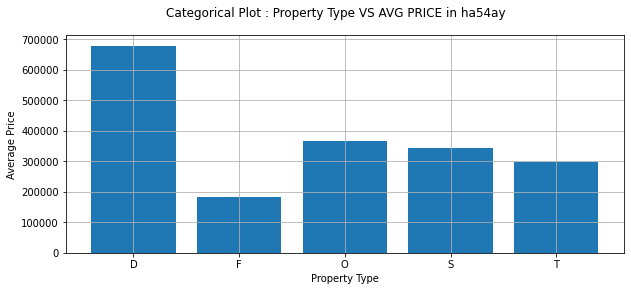

In [52]:
# Making Categorical bar plot using matplotlib
plt.figure(figsize=(10, 4))
plt.bar(dataGroupPropertyTypeAll['Property_type'], dataGroupPropertyTypeAll['Price'])
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.grid()
plt.suptitle('Categorical Plot : Property Type VS AVG PRICE in '+postCode)
plt.show()

In [53]:
# Counting no of properties transferred of each property type
cols = ['Property_type','Data_of_transfer']
countproperty = pd.DataFrame(mergedDataAll,columns=cols)
countproperty = countproperty.groupby('Property_type').count().reset_index()
countproperty.set_index = ['Property_type','Data_of_transfer']
countproperty

,Property_type,Data_of_transfer
0,D,5745
1,F,18219
2,O,359
3,S,20567
4,T,15132


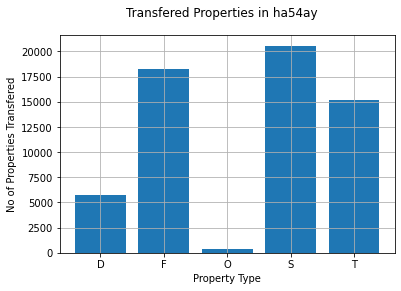

In [54]:
# Data visulization of no of properties transferred of each property type using matplotlib
plt.figure()
plt.bar(countproperty['Property_type'], countproperty['Data_of_transfer'])
plt.xlabel('Property Type')
plt.ylabel('No of Properties Transfered')
plt.grid()
plt.suptitle('Transfered Properties in '+postCode)
plt.show()

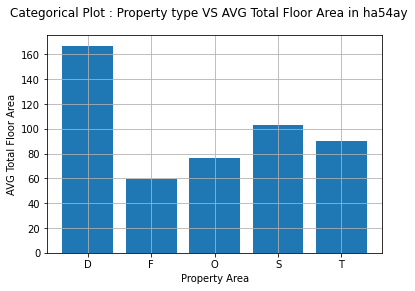

In [56]:
# Average total floor area for each property type in user entered post code
propertyAreaData = mergedDataAll.groupby('Property_type')['TOTAL_FLOOR_AREA'].mean().reset_index()
propertyAreaData.set_index = ['Property_type','TOTAL_FLOOR_AREA']
# Visualise the result in graph
plt.figure()
plt.bar(propertyAreaData['Property_type'], propertyAreaData['TOTAL_FLOOR_AREA'])
plt.xlabel('Property Area')
plt.ylabel('AVG Total Floor Area')
plt.grid()
plt.suptitle('Categorical Plot : Property type VS AVG Total Floor Area in '+postCode)
plt.show()

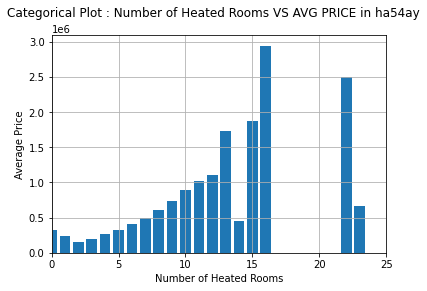

In [60]:
# Average price for no of bedrooms in user entered post code
analysiscol = ['NUMBER_HEATED_ROOMS','Price']
analysisData = pd.DataFrame(mergedDataAll,columns=analysiscol)
analysisData = analysisData.groupby('NUMBER_HEATED_ROOMS')['Price'].mean().reset_index()
analysisData.set_index = ['NUMBER_HEATED_ROOMS','Price']

# Data visulization 
plt.figure()
plt.bar(analysisData['NUMBER_HEATED_ROOMS'], analysisData['Price'])
plt.xlabel('Number of Heated Rooms')
plt.ylabel('Average Price')
plt.grid()
plt.xlim(0,25)
plt.suptitle('Categorical Plot : Number of Heated Rooms VS AVG PRICE in '+postCode)
plt.show()

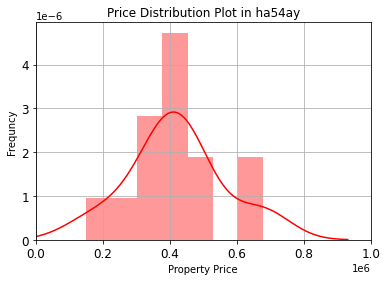

In [70]:
# DIstribution Plot for user entered property type.
plt.figure()
sns.distplot(mergedData['Price'], color='r')
plt.title('Price Distribution Plot in '+ postCode)
plt.xlabel('Property Price')
plt.ylabel('Frequncy')
plt.xticks(fontsize = 12)
plt.xlim(0,1000000)
plt.grid()
plt.yticks(fontsize = 12)
plt.savefig('distplot.png')
plt.show()

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'BUILDING_REFERENCE_NUMBER'}>,
        <AxesSubplot:title={'center':'CURRENT_ENERGY_EFFICIENCY'}>],
       [<AxesSubplot:title={'center':'POTENTIAL_ENERGY_EFFICIENCY'}>,
        <AxesSubplot:title={'center':'ENVIRONMENT_IMPACT_CURRENT'}>,
        <AxesSubplot:title={'center':'ENVIRONMENT_IMPACT_POTENTIAL'}>],
       [<AxesSubplot:title={'center':'ENERGY_CONSUMPTION_CURRENT'}>,
        <AxesSubplot:title={'center':'ENERGY_CONSUMPTION_POTENTIAL'}>,
        <AxesSubplot:title={'center':'TOTAL_FLOOR_AREA'}>],
       [<AxesSubplot:title={'center':'NUMBER_HABITED_ROOMS'}>,
        <AxesSubplot:title={'center':'NUMBER_HEATED_ROOMS'}>,
        <AxesSubplot:>]], dtype=object)

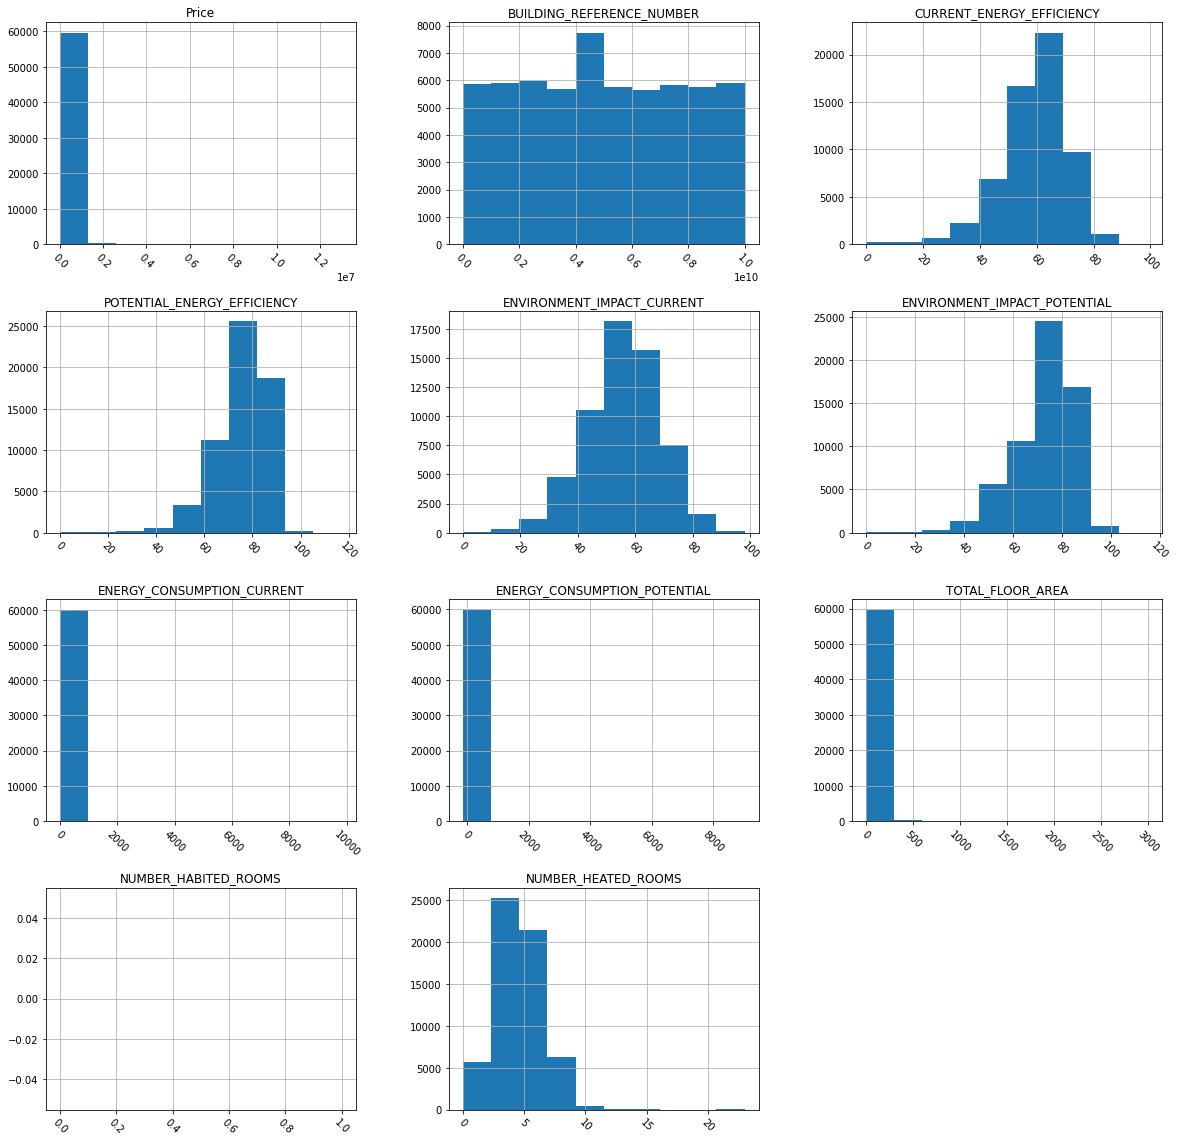

In [72]:
# Making histogram for finding feature columns and outliners
mergedDataAll.hist(figsize=(20,20), xrot=-45)

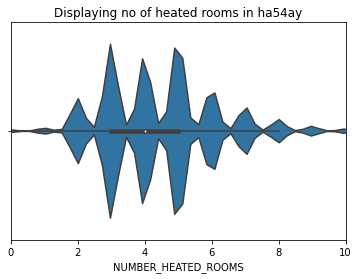

In [76]:
# Data visulization of no of rooms frequency
plt.figure()
sns.violinplot(data=mergedDataAll,x='NUMBER_HEATED_ROOMS')
plt.title('Displaying no of heated rooms in '+postCode)
plt.xlim(0,10)
plt.show()

<AxesSubplot:>

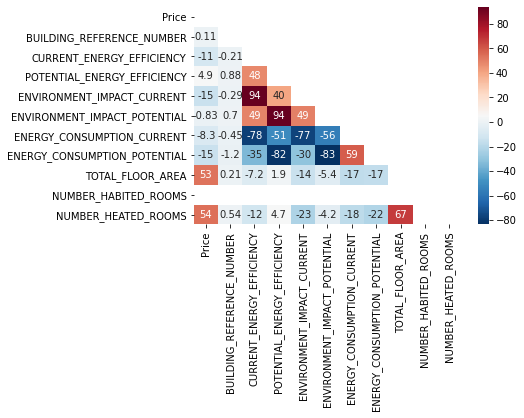

In [79]:
import numpy as np
mask = np.zeros_like(mergedDataAll.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# heatmap for showing correlation between feature columns
sns.heatmap(mergedDataAll.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

In [80]:
# Calculating estimated price for user entered property type
estimated_price = mergedData.groupby('Property_type').mean()
estimated = estimated_price['Price'].mean()
print('£','{:0,.0f}'.format(estimated))
variation = estimated * 0.05
print('Estimated Fair Market Value : ','£','{:0,.0f}'.format(estimated-variation),'~','£',
      '{:0,.0f}'.format(estimated+variation))

£ 419,750
Estimated Fair Market Value :  £ 398,762 ~ £ 440,738


In [81]:
# Calculating monthly rental value for user entered property type
monthlyRentalValue = (estimated * 0.04)/12
print('£','{:0,.0f}'.format(monthlyRentalValue))
print('Estimated Monthly Rental Value @ 4% Yield')

£ 1,399
Estimated Monthly Rental Value @ 4% Yield


In [83]:
# Searched Property Information
print('Property information based on user input')
print('-------------------------')
print('PostCode : ',postCode.upper())
print('Type of Property : ',houseType)
print('Total Floor Area(SQFT.) : ',totalArea)
print('Total Rooms : ',noOfRooms)
print('Estimated SQFT Price : ','£','{:0,.2f}'.format(estimated/int(totalArea)))
print('Energy Rating : ',currentEnergyRating)

Property information based on user input
-------------------------
PostCode :  HA54AY
Type of Property :  S
Total Floor Area(SQFT.) :  110
Total Rooms :  3
Estimated SQFT Price :  £ 3,815.91
Energy Rating :  C


In [84]:
# Searched Property Location Information
locationInformation = mergedData.query('Postcode == @postCode')
locationInformationCounty = locationInformation['County'].unique()
locationInformationDistrict = locationInformation['District'].unique()
locationInformationConstituency = locationInformation['CONSTITUENCY_LABEL'].unique()
locationInformationLocalAuthority = locationInformation['POSTTOWN'].unique()
locationInformationTown = locationInformation['Town'].unique()

print('Location Information')
print('-------------------------')
print('County : ',locationInformationCounty[0])
print('District : ',locationInformationDistrict[0])
print('Constituency : ',locationInformationConstituency[0])
print('Ward : ',locationInformationLocalAuthority[0])
print('Town : ',locationInformationTown[0])

Location Information
-------------------------
County :  GREATER LONDON
District :  HARROW
Constituency :  Ruislip, Northwood and Pinner
Ward :  PINNER
Town :  PINNER


In [85]:
# Get all Area Price Insights informations
allPropertyData = mergedDataAll.query('Postcode == @postCode')
detachedPropertyData = mergedDataAll.query('Postcode == @postcode' and 'Property_type == "D"')
semiDetachedPropertyData = mergedDataAll.query('Postcode == @postcode' and 'Property_type == "S"')
terracePropertyData = mergedDataAll.query('Postcode == @postcode' and 'Property_type == "T"')
flatPropertyData = mergedDataAll.query('Postcode == @postcode' and 'Property_type == "F"')

In [86]:
# Area Price Insights
print('Area Price Insights')
print('----------------------------')
print('[1] All Properties ')
print('----------------------------')
print('Mean Price : ','{:0,.2f}'.format(allPropertyData['Price'].mean()))
print('Median Price : ','{:0,.2f}'.format(allPropertyData['Price'].median()))
print('Highest Price : ','{:0,.2f}'.format(allPropertyData['Price'].max()))
print('Lowest Price : ','{:0,.2f}'.format(allPropertyData['Price'].min()))
print('Units Sold : ',allPropertyData['Price'].count())
print('Mean Square Foot Price : ','{:0,.2f}'.format((allPropertyData['Price'].mean()/allPropertyData['TOTAL_FLOOR_AREA'].mean())))
print('Median Square Foot Price : ','{:0,.2f}'.format((allPropertyData['Price'].median()/allPropertyData['TOTAL_FLOOR_AREA'].median())))
print('----------------------------')
print('[2] Detached Properties ')
print('----------------------------')
print('Mean Price : ','{:0,.2f}'.format(detachedPropertyData['Price'].mean()))
print('Median Price : ','{:0,.2f}'.format(detachedPropertyData['Price'].median()))
print('Highest Price : ','{:0,.2f}'.format(detachedPropertyData['Price'].max()))
print('Lowest Price : ','{:0,.2f}'.format(detachedPropertyData['Price'].min()))
print('Units Sold : ','{:0,.2f}'.format(detachedPropertyData['Price'].count()))
print('Mean Square Foot Price : ','{:0,.2f}'.format((detachedPropertyData['Price'].mean()/detachedPropertyData['TOTAL_FLOOR_AREA'].mean())))
print('Median Square Foot Price : ','{:0,.2f}'.format((detachedPropertyData['Price'].median()/detachedPropertyData['TOTAL_FLOOR_AREA'].median())))
print('----------------------------')
print('[3] Semi Detached Properties ')
print('----------------------------')
print('Mean Price : ','{:0,.2f}'.format(semiDetachedPropertyData['Price'].mean()))
print('Median Price : ','{:0,.2f}'.format(semiDetachedPropertyData['Price'].median()))
print('Highest Price : ','{:0,.2f}'.format(semiDetachedPropertyData['Price'].max()))
print('Lowest Price : ','{:0,.2f}'.format(semiDetachedPropertyData['Price'].min()))
print('Units Sold : ','{:0,.2f}'.format(semiDetachedPropertyData['Price'].count()))
print('Mean Square Foot Price : ','{:0,.2f}'.format((semiDetachedPropertyData['Price'].mean()/semiDetachedPropertyData['TOTAL_FLOOR_AREA'].mean())))
print('Median Square Foot Price : ','{:0,.2f}'.format((semiDetachedPropertyData['Price'].median()/semiDetachedPropertyData['TOTAL_FLOOR_AREA'].median())))
print('----------------------------')
print('[4] Terraced Properties ')
print('----------------------------')
print('Mean Price : ','{:0,.2f}'.format(terracePropertyData['Price'].mean()))
print('Median Price : ','{:0,.2f}'.format(terracePropertyData['Price'].median()))
print('Highest Price : ','{:0,.2f}'.format(terracePropertyData['Price'].max()))
print('Lowest Price : ','{:0,.2f}'.format(terracePropertyData['Price'].min()))
print('Units Sold : ','{:0,.2f}'.format(terracePropertyData['Price'].count()))
print('Mean Square Foot Price : ','{:0,.2f}'.format((terracePropertyData['Price'].mean()/terracePropertyData['TOTAL_FLOOR_AREA'].mean())))
print('Median Square Foot Price : ','{:0,.2f}'.format((terracePropertyData['Price'].median()/terracePropertyData['TOTAL_FLOOR_AREA'].median())))
print('----------------------------')
print('[5] Flats ')
print('----------------------------')
print('Mean Price : ','{:0,.2f}'.format(flatPropertyData['Price'].mean()))
print('Median Price : ','{:0,.2f}'.format(flatPropertyData['Price'].median()))
print('Highest Price : ','{:0,.2f}'.format(flatPropertyData['Price'].max()))
print('Lowest Price : ','{:0,.2f}'.format(flatPropertyData['Price'].min()))
print('Units Sold : ','{:0,.2f}'.format(flatPropertyData['Price'].count()))
print('Mean Square Foot Price : ','{:0,.2f}'.format((flatPropertyData['Price'].mean()/flatPropertyData['TOTAL_FLOOR_AREA'].mean())))
print('Median Square Foot Price : ','{:0,.2f}'.format((flatPropertyData['Price'].median()/flatPropertyData['TOTAL_FLOOR_AREA'].median())))

Area Price Insights
----------------------------
[1] All Properties 
----------------------------
Mean Price :  438,588.24
Median Price :  430,000.00
Highest Price :  680,000.00
Lowest Price :  151,000.00
Units Sold :  17
Mean Square Foot Price :  4,186.79
Median Square Foot Price :  4,725.27
----------------------------
[2] Detached Properties 
----------------------------
Mean Price :  678,228.31
Median Price :  604,950.00
Highest Price :  6,000,000.00
Lowest Price :  45,000.00
Units Sold :  5,745.00
Mean Square Foot Price :  4,060.64
Median Square Foot Price :  4,033.00
----------------------------
[3] Semi Detached Properties 
----------------------------
Mean Price :  342,693.92
Median Price :  311,000.00
Highest Price :  2,175,000.00
Lowest Price :  1,100.00
Units Sold :  20,567.00
Mean Square Foot Price :  3,325.66
Median Square Foot Price :  3,239.58
----------------------------
[4] Terraced Properties 
----------------------------
Mean Price :  297,325.62
Median Price :  265,0

In [89]:
# Getting information regarding similar properties which has been sold recently in user entered postcode
print('Similar Properties which transferred recently in',postCode.upper())
similarProperty = mergedData.sort_values(by='Data_of_transfer',ascending=False)
#similarProperty = similarProperty['PAON'].unique()
similarProperty
keep_property_cols = ['Data_of_transfer','Postcode','PAON','Street_x','Price','TOTAL_FLOOR_AREA']
displayData = pd.DataFrame(similarProperty, columns=keep_property_cols)
displayData.head()

Similar Properties which transferred recently in HA54AY


,Data_of_transfer,Postcode,PAON,Street_x,Price,TOTAL_FLOOR_AREA
6,2020-04-08 00:00,ha54ay,39,OXHEY LANE,670000,146.0
13,2020-04-03 00:00,ha54ay,77,OXHEY LANE,477500,91.0
3,2017-05-08 00:00,ha54ay,49,OXHEY LANE,680000,86.0
12,2014-01-21 00:00,ha54ay,67,OXHEY LANE,365000,88.0
10,2013-08-23 00:00,ha54ay,73,OXHEY LANE,440000,128.0


In [90]:
# Getting properties which is under user budget.
budgetPrice = int(budgetPrice)
budgetData = mergedDataAll.query('Price < @budgetPrice')
budgetData = budgetData.query('Property_type == @houseType')
budgetData = budgetData.sort_values(by='Price',ascending=False)
budgetData.head()
keep_property_cols = ['Data_of_transfer','Property_type','Postcode','PAON','Street_x','Price','TOTAL_FLOOR_AREA']
displayBudgetData = pd.DataFrame(budgetData, columns=keep_property_cols)
displayBudgetData.head()

,Data_of_transfer,Property_type,Postcode,PAON,Street_x,Price,TOTAL_FLOOR_AREA
51308,2013-11-08 00:00,S,ha14nb,90,SUSSEX ROAD,389950,94.80
52442,2014-05-30 00:00,S,ha38tj,16,OAKFIELD AVENUE,389950,81.00
7022,2004-09-24 00:00,S,ha51la,10,MOORCROFT WAY,389950,115.00
53412,2014-08-15 00:00,S,ha38pd,243,KENMORE AVENUE,389950,87.74
39964,2014-04-24 00:00,S,ha85bn,51,ORCHARD GROVE,389950,116.00


In [94]:
# Calculating average and std of price of each property type
avgD = mergedDataAll.query("Property_type == 'D'")
avgS = mergedDataAll.query("Property_type == 'S'")
avgT = mergedDataAll.query("Property_type == 'T'")
avgF = mergedDataAll.query("Property_type == 'F'")
avgPriceD = avgD['Price'].mean()
avgPriceS = avgS['Price'].mean()
avgPriceT = avgT['Price'].mean()
avgPriceF = avgF['Price'].mean()
stdD = avgD['Price'].std()
stdS = avgS['Price'].std()
stdT = avgT['Price'].std()
stdF = avgF['Price'].std()
print('Property Type:   mean of Price-------STD of Price')
print('Detached : ','{:0,.2f}'.format(avgPriceD),'-------','{:0,.2f}'.format(stdD))
print('Semi-Detached : ','{:0,.2f}'.format(avgPriceS),'-------','{:0,.2f}'.format(stdS))
print('Terraced : ','{:0,.2f}'.format(avgPriceT),'-------','{:0,.2f}'.format(stdT))
print('Flats : ','{:0,.2f}'.format(avgPriceF),'-------','{:0,.2f}'.format(stdF))

Property Type:   mean of Price-------STD of Price
Detached :  678,228.31 ------- 426,730.44
Semi-Detached :  342,693.92 ------- 193,968.85
Terraced :  297,325.62 ------- 162,588.10
Flats :  181,387.03 ------- 106,712.30


In [95]:
# Selecting feature columns based on analysis of all above diagrams 
keep_cols = ['Price','Property_type','Old_new','Duration','CURRENT_ENERGY_RATING','ENERGY_CONSUMPTION_CURRENT',
            'CURRENT_ENERGY_EFFICIENCY', 'POTENTIAL_ENERGY_EFFICIENCY','ENVIRONMENT_IMPACT_CURRENT',
             'ENVIRONMENT_IMPACT_POTENTIAL','NUMBER_HEATED_ROOMS']

mergeDataModeling = pd.DataFrame(mergedDataAll, columns=keep_cols)
mergeDataModeling.head()

,Price,Property_type,Old_new,Duration,CURRENT_ENERGY_RATING,ENERGY_CONSUMPTION_CURRENT,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,NUMBER_HEATED_ROOMS
0,58000,T,N,F,F,704,26,39,25,30,5.0
1,247000,T,N,F,F,704,26,39,25,30,5.0
2,105000,S,N,F,D,281,55,88,51,89,5.0
3,105000,S,N,F,E,330,52,87,45,86,4.0
4,75000,T,N,F,C,166,73,89,74,91,3.0


In [97]:
# Preparing columns into numeric values for regression models
propertyTypeDic = {'D':0, 'S':1,'T':2,'F':3,'O':4}
oldnewDic = {'O':0, 'N':1}
durationDic = {'F':0,'L':1}

mergeDataModeling['Property_type'] = mergeDataModeling['Property_type'].replace(propertyTypeDic)
mergeDataModeling['Old_new'] = mergeDataModeling['Old_new'].replace(oldnewDic)
mergeDataModeling['Duration'] = mergeDataModeling['Duration'].replace(durationDic)
mergeDataModeling.head()

,Price,Property_type,Old_new,Duration,CURRENT_ENERGY_RATING,ENERGY_CONSUMPTION_CURRENT,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,NUMBER_HEATED_ROOMS
0,58000,2,1,0,F,704,26,39,25,30,5.0
1,247000,2,1,0,F,704,26,39,25,30,5.0
2,105000,1,1,0,D,281,55,88,51,89,5.0
3,105000,1,1,0,E,330,52,87,45,86,4.0
4,75000,2,1,0,C,166,73,89,74,91,3.0


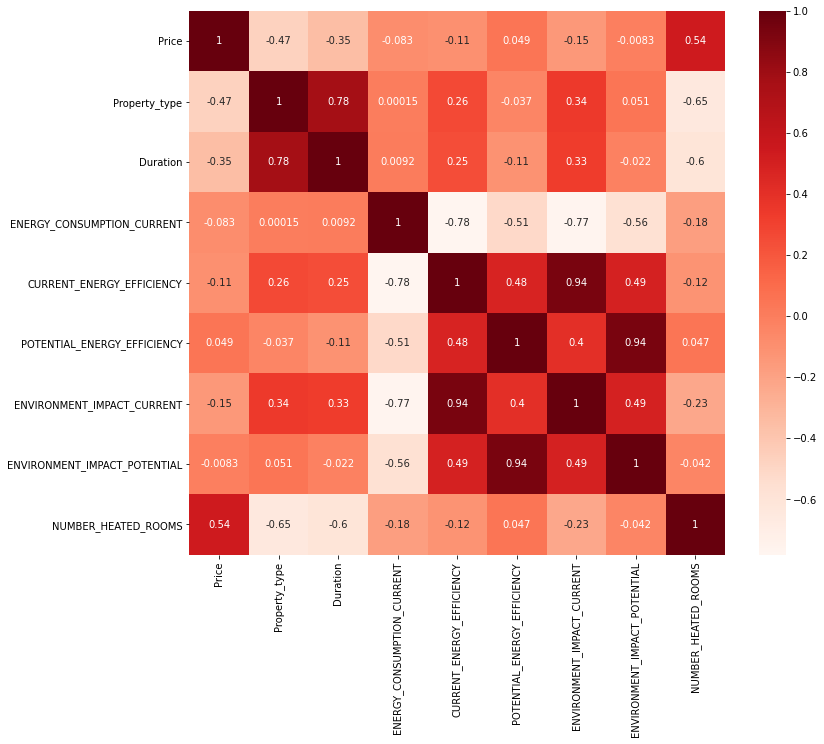

,Price,Property_type,Duration,ENERGY_CONSUMPTION_CURRENT,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,ENVIRONMENT_IMPACT_CURRENT,ENVIRONMENT_IMPACT_POTENTIAL,NUMBER_HEATED_ROOMS
Price,1.000000,-0.474007,-0.352739,-0.082687,-0.105191,0.049228,-0.146721,-0.008296,0.536432
Property_type,-0.474007,1.000000,0.775184,0.000153,0.263857,-0.036959,0.344145,0.050561,-0.645614
Duration,-0.352739,0.775184,1.000000,0.009199,0.245461,-0.111110,0.328198,-0.022449,-0.603571
ENERGY_CONSUMPTION_CURRENT,-0.082687,0.000153,0.009199,1.000000,-0.781133,-0.513446,-0.771068,-0.563782,-0.177814
CURRENT_ENERGY_EFFICIENCY,-0.105191,0.263857,0.245461,-0.781133,1.000000,0.478385,0.936757,0.493050,-0.116215
POTENTIAL_ENERGY_EFFICIENCY,0.049228,-0.036959,-0.111110,-0.513446,0.478385,1.000000,0.401716,0.937108,0.047325
ENVIRONMENT_IMPACT_CURRENT,-0.146721,0.344145,0.328198,-0.771068,0.936757,0.401716,1.000000,0.494365,-0.225269
ENVIRONMENT_IMPACT_POTENTIAL,-0.008296,0.050561,-0.022449,-0.563782,0.493050,0.937108,0.494365,1.000000,-0.041994
NUMBER_HEATED_ROOMS,0.536432,-0.645614,-0.603571,-0.177814,-0.116215,0.047325,-0.225269,-0.041994,1.000000


In [99]:
# Plot heatmap of correlation between all feature columns
plt.figure(figsize=(12,10))
cor = mergeDataModeling.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cor

In [101]:
#Corelation with output variable price
cor_target = abs(cor["Price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Price                  1.000000
NUMBER_HEATED_ROOMS    0.536432
Name: Price, dtype: float64

In [116]:
# importing packages for machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import r2_score as r2

mergeDataModeling = mergeDataModeling.dropna()
#split dataset in features and target variable
feature_cols = ['Property_type','Old_new','Duration','ENERGY_CONSUMPTION_CURRENT','CURRENT_ENERGY_EFFICIENCY',
                'POTENTIAL_ENERGY_EFFICIENCY','NUMBER_HEATED_ROOMS']
X = mergeDataModeling[feature_cols] # Features
y = mergeDataModeling.Price # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.77, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [119]:
# Implement different machine learning models
#Linear Regression
regr = linear_model.LinearRegression()
regr = regr.fit(X_train,y_train)
regr_pred = regr.predict(X_test)
regr_evs = evs(y_test,regr_pred)
regr_r2 = r2(y_test,regr_pred)
regr_mse = mean_squared_error(y_test,regr_pred)
regr_rmse = mean_squared_error(y_test,regr_pred,squared=False)

# Ridge
ridgeModel = Ridge(alpha = 0.5)
ridgeModel.fit(X_train,y_train)
ridgePred = ridgeModel.predict(X_test)
ridge_evs = evs(y_test,ridgePred)
ridge_r2 = r2(y_test,ridgePred)
ridge_mse = mean_squared_error(y_test,ridgePred)
ridge_rmse = mean_squared_error(y_test,ridgePred,squared=False)

# Lasso
lassoModel = Lasso(alpha = 0.01)
lassoModel.fit(X_train,y_train)
lassoPred = lassoModel.predict(X_test)
lasso_evs = evs(y_test,lassoPred)
lasso_r2 = r2(y_test,lassoPred)
lasso_mse = mean_squared_error(y_test,lassoPred)
lasso_rmse = mean_squared_error(y_test,lassoPred,squared=False)

#Bayesian
bayesianModel = BayesianRidge()
bayesianModel.fit(X_train,y_train)
bayesianPred = bayesianModel.predict(X_test)
bayesian_evs = evs(y_test,bayesianPred)
bayesian_r2 = r2(y_test,bayesianPred)
bayesian_mse = mean_squared_error(y_test,bayesianPred)
bayesian_rmse = mean_squared_error(y_test,bayesianPred,squared=False)

# ElasticNet
elasticnetModel = ElasticNet(alpha = 0.01)
elasticnetModel.fit(X_train,y_train)
elasticnetPred = elasticnetModel.predict(X_test)
elastic_evs = evs(y_test,elasticnetPred)
elastic_r2 = r2(y_test,elasticnetPred)
elastic_mse = mean_squared_error(y_test,elasticnetPred)
elastic_rmse = mean_squared_error(y_test,elasticnetPred,squared=False)

#XGBoost
xgmodel = xgb.XGBRegressor()
xgmodel.fit(X_train,y_train)
xgPred = xgmodel.predict(X_test)
xg_evs = evs(y_test,xgPred)
xg_r2 = r2(y_test,xgPred)
xg_mse = mean_squared_error(y_test,xgPred)
xg_rmse = mean_squared_error(y_test,xgPred,squared=False)

#Evaluation

#Variance score
print('Variance Score of different models')
print(regr_evs)
print(ridge_evs)
print(lasso_evs)
print(bayesian_evs)
print(elastic_evs)
print(xg_evs)
print('-----------------------------------')
print('R-Squared value of different models')
print(regr_r2)
print(ridge_r2)
print(lasso_r2)
print(bayesian_r2)
print(elastic_r2)
print(xg_r2)
print('-----------------------------------')
print('Mean Square Error(MSE) of different models')
print(regr_mse)
print(ridge_mse)
print(lasso_mse)
print(bayesian_mse)
print(elastic_mse)
print(xg_mse)
print('-----------------------------------')
print('Root Mean Square Error(RMSE) of different models')
print(regr_rmse)
print(ridge_rmse)
print(lasso_rmse)
print(bayesian_rmse)
print(elastic_rmse)
print(xg_rmse)

Variance Score of different models
0.3339029142423393
0.3339028509054549
0.3339029140784384
0.3338984098985788
0.3338281766882655
0.36521050012100476
-----------------------------------
R-Squared value of different models
0.3338529106084235
0.3338528633579507
0.3338529104956648
0.3338488266983536
0.3337801712671862
0.36520434387633394
-----------------------------------
Mean Square Error(MSE) of different models
37991193282.68906
37991195977.442024
37991193289.11983
37991426193.13674
37995341697.38036
36203182226.36458
-----------------------------------
Root Mean Square Error(RMSE) of different models
194913.2968339745
194913.30374667098
194913.296850471
194913.8943049898
194923.93823586768
190271.3384258506


In [120]:
model = ['Linear Regression','Ridge','Lasso','Bayesian','ElasticNet','XGBoost']
varianceScore = [regr_evs, ridge_evs, lasso_evs, bayesian_evs, elastic_evs, xg_evs]
r2Score = [regr_r2, ridge_r2, lasso_r2, bayesian_r2, elastic_r2, xg_r2]
mseScore = [regr_mse, ridge_mse, lasso_mse, bayesian_mse, elastic_mse, xg_mse]
rmseScore = [regr_rmse, ridge_rmse, lasso_rmse, bayesian_rmse, elastic_rmse, xg_rmse]
modelDataframe = pd.DataFrame()
modelDataframe['Model'] = model
modelDataframe['Variance'] = varianceScore
modelDataframe['R2'] = r2Score
modelDataframe['MSE'] = mseScore
modelDataframe['RMSE'] = rmseScore
modelDataframe

,Model,Variance,R2,MSE,RMSE
0,Linear Regression,0.333903,0.333853,3.799119e+10,194913.296834
1,Ridge,0.333903,0.333853,3.799120e+10,194913.303747
2,Lasso,0.333903,0.333853,3.799119e+10,194913.296850
3,Bayesian,0.333898,0.333849,3.799143e+10,194913.894305
4,ElasticNet,0.333828,0.333780,3.799534e+10,194923.938236
5,XGBoost,0.365211,0.365204,3.620318e+10,190271.338426


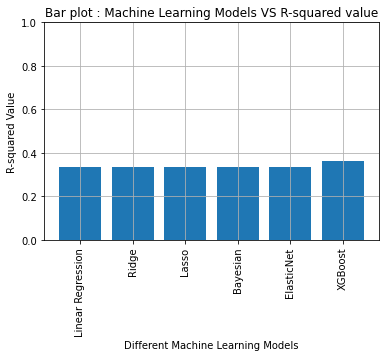

In [122]:
# Visulizing R-squared value of each machine learning models
plt.figure()
plt.bar(modelDataframe['Model'],modelDataframe['R2'])
plt.grid()
plt.title('Bar plot : Machine Learning Models VS R-squared value')
plt.xlabel('Different Machine Learning Models')
plt.ylabel('R-squared Value')
plt.xticks(rotation='vertical')
plt.ylim(0,1)
plt.show()

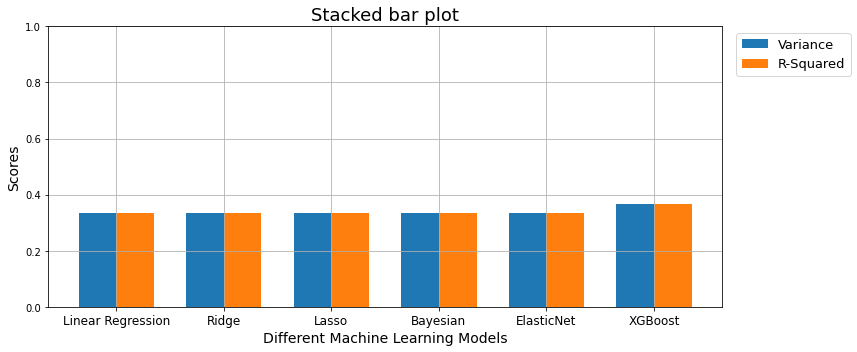

In [124]:
# Stacked bar plot of variance score and r-squared value of different machine learning models
fig, ax = plt.subplots(figsize=(12,5))

x = np.arange(len(modelDataframe['Model']))  # Set location of Labels
width = 0.35  # the width of the bars

variancePlot = ax.bar(x - width/2, modelDataframe['Variance'], width, label='Variance')
r2Plot = ax.bar(x + width/2, modelDataframe['R2'], width, label='R-Squared')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Different Machine Learning Models',fontsize=14)
ax.set_ylabel('Scores',fontsize=14)
ax.set_title('Stacked bar plot',fontsize=18)
ax.set_xticks(x, modelDataframe['Model'],fontsize=12)
ax.set_ylim(0,1)
ax.grid()
ax.legend(bbox_to_anchor=(1.2,1), fontsize=13)
fig.tight_layout()
plt.savefig('stacked_bar.png')
plt.show()

In [129]:
# Importing packages for evaluating ensemble method(RandomForestClassifier)
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
#Accuracy performance
accuracyRF = mean(n_scores)*100
print('Accuracy performance of RandomForestClassifier :',"{:.2f}".format(accuracyRF))

Accuracy performance of RandomForestClassifier : 90.30


In [133]:
# Importing package for GradientBoostingClassifier ensemble method
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Accuracy performance
accuracyGBC = mean(n_scores)*100
print('Accuracy performance of RandomForestClassifier :',"{:.2f}".format(accuracyGBC))

Accuracy performance of RandomForestClassifier : 90.00


In [135]:
# Get Prediction from ensemble methods
from sklearn.ensemble import GradientBoostingRegressor

m = GradientBoostingRegressor(n_estimators=1500, max_depth=4, min_samples_leaf=15, min_samples_split=10,
                             learning_rate=0.01, loss='huber', random_state=5)
m.fit(X_train,y_train)
predictGBR = m.predict(X_test)
print(predictGBR)

[300486.66889611 153549.78637109 299087.66939926 ... 165946.2183449
 400076.89321728 448320.19107295]
